
# Première partie : Importation et nettoyage des données
# Deuxième partie : Création d'un df général - les jointures
# Troisième partie : Le chiffre d'affaire de Bottleneck
# Quatrième partie : Etudes des outliers
#  


# Première partie : Importation et nettoyage des données

# 1- Importation des librairies

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# 2- Importation des fichiers de données

In [4]:
liaison=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 5/liaison.xlsx')

In [84]:
erp=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 5/erp.xlsx')

In [83]:
web=pd.read_excel('/Users/anapereira/Desktop/Projets/projet 5/web.xlsx')

# 3- Création de définitions :
Vérifier systématiquement les clés uniques (clés primaires) et l'absence de données manquantes (null) dans les dataframes

### La taille du df initial doit être égale à la taille du df final (ok) sinon cela signifie que la colonne a des doublons qui doivent être traités.

In [7]:
def check_key(df,column):
    if df.size==df.drop_duplicates(column).size:
        print("ok")
    else: 
        print("ko")

### La taille du df initial doit être égale à la taille du df final (ok) sinon cela signifie que la colonne a des données manquantes qui doivent être traitées.

In [8]:
def check_null(df,column):
    if df[column].size==df[column].dropna().size:
        print("ok")
    else: 
        print("ko")

# 4- Nettoyage du df web (le fichier mère)
utilisation des fonctions de verification de clé unique et de null dans la colonne sku

In [9]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [10]:
check_key(web,'sku')

ko


### Dans le df web, la colonne sku ne peut pas encore être utilisée comme clef primaire

In [11]:
check_null(web,'sku')

ko


## 4-1 Recherche des sku null et récupération des informations que ces lignes pourraient contenir

In [12]:
cherchenull=web[web['sku'].isnull()]
cherchenull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

In [13]:
web_error_data=cherchenull[cherchenull['post_name'].notnull()]
web_error_data.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Ces deux lignes (web_error_data) n'ont pas de sku et ont pourtant des infos : est-ce des erreurs de saisie ? Il faudrait vérifier s'il n'y a pas des sku pour ces produits.

## 4-2 Identification et suppression des sku en doublons

In [14]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [15]:
web['post_type'].unique()

array(['product', nan, 'attachment'], dtype=object)

In [16]:
web['sku'].nunique()

714

### Identification des doublons :
chaque sku semble avoir deux lignes : une pour le produit et une avec l'image du produit "attachment"

In [17]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [18]:
why_doublon_web=web[web['sku']==15298]
why_doublon_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### Sélection des lignes produits

In [19]:
web2=web[(web['post_type']=='product')]

In [20]:
check_key(web2,'sku')

ko


In [21]:
check_null(web2,'sku')

ko


In [22]:
web2.shape

(716, 28)

## 4-3 Suppression des sku nuls.
Il y a 714 sku uniques et les deux lignes de sku nuls identifiés et isolés plus haut ce qui fait bien 716. On peut donc supprimer les 2 sku nuls.

In [23]:
web3=web2.dropna(subset=['sku'])
web3

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
check_key(web3,'sku')

ok


In [25]:
check_null(web3,'sku')

ok


In [26]:
web3.shape

(714, 28)

In [27]:
web3.reset_index()

,index,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Il y a 714 identifiants uniques sur le dataframe web3

# 5- Le df liaison

In [28]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


## 5-1 Renommer la colonne id_web en sku.
Sku du df web correspond à id_web du df liaison : Sur le df liaison, modification du nom de la colonne id_web en sku (afin de procéder à une jointure ultérieurement)

In [29]:
liaison.rename(columns={'id_web': 'sku'}, inplace=True)

In [30]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


## 5-2  Vérification de clés uniques et non nuls

In [31]:
check_key(liaison,'product_id')

ok


In [32]:
check_null(liaison,'product_id')

ok


In [33]:
liaison.shape

(825, 2)

In [34]:
liaison.isnull().sum()

product_id     0
sku           91
dtype: int64

In [35]:
liaison['sku'].nunique()

734

In [36]:
liaison['product_id'].nunique()

825

### Il y a 734 sku dans le df liaison et seulement 714 sku dans le df mère web3. 
(Pour les 20 sku restants, voir liste en deuxième partie)

# 6- Nettoyage du df erp
Vérification de la clé primaire product_id pour la jointure avec le df liaison

In [37]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [38]:
check_key(erp,'product_id')

ok


In [39]:
check_null(erp,'product_id')

ok


In [40]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [41]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [42]:
erp.shape

(825, 5)

### On remarque : 825 product_id dans le df erp comme dans le df liaison

# Deuxième partie : Création d'un df général - les jointures
Regroupement des informations du df mère web3 et du sku en utilisant le df liaison qui fait le lien entre sku du df web3 et product_id de l'erp2

# 1- La jointure entre la table erp et la table liaison

In [43]:
general_1=erp.merge(liaison,how="outer",on="product_id",indicator=True)
general_1

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [44]:
general_1['_merge'].unique()

['both']
Categories (1, object): ['both']

In [45]:
general_1a=general_1.drop(columns=['_merge'])
general_1a

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [46]:
check_key(general_1a,'product_id')

ok


In [47]:
check_null(general_1a,'product_id')

ok


# 2- La jointure entre le df general_1a et la table web3

In [48]:
general_2=general_1a.merge(web3,how="outer",on='sku',indicator=True)
general_2

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [49]:
general_2['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [50]:
general=general_2.loc[general_2['_merge']=='both'].drop(columns=['_merge'])
general

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [51]:
check_key(general,'sku')

ok


In [52]:
check_null(general,'sku')

ok


In [53]:
check_key(general,'product_id')

ok


In [54]:
check_null(general,'product_id')

ok


In [55]:
general.shape

(714, 33)

In [56]:
general.isnull().sum()

product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64

In [57]:
general.reset_index()

,index,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# 3- Les left_only à vérifier : Les product_id qui ne correspondent pas au df web3 (ventes en ligne).
Les products_id qui ne sont pas vendus sur le web (sans sku) et ceux qui ont un sku qui ne correspond pas au df web3
(nb : la liste des product_id est exhaustive, contrairement aux sku)

In [58]:
outer_join_test=general_2[general_2['_merge']=='left_only']
outer_join_test

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [59]:
outer_join_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 19 to 823
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             111 non-null    int64         
 1   onsale_web             111 non-null    int64         
 2   price                  111 non-null    float64       
 3   stock_quantity         111 non-null    int64         
 4   stock_status           111 non-null    object        
 5   sku                    20 non-null     object        
 6   virtual                0 non-null      float64       
 7   downloadable           0 non-null      float64       
 8   rating_count           0 non-null      float64       
 9   average_rating         0 non-null      float64       
 10  total_sales            0 non-null      float64       
 11  tax_status             0 non-null      object        
 12  tax_class              0 non-null      float64       
 13  post

### Dans les 111 product_id non présents sur le df web3, les 20 suivants ont un sku. De plus, il est a noté que 2 ont des stocks

In [60]:
sku_not_null_test=outer_join_test[outer_join_test['sku'].notna()]
sku_not_null_test

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
462,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
490,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
491,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
534,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
536,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


# Troisième partie : Le chiffre d'affaire de Bottleneck

# 1- Calcul du chiffre d'affaire par produit.
Création d'une colonne CA dans le df general

In [61]:
general['CA']=general['price']*general['total_sales']
general

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


## 1-1 Le CA par produit.

In [62]:
general[['product_id','sku','price','stock_status',
         'stock_quantity','total_sales','post_title','CA']] .sort_values('CA',ascending=False).head(20)

,product_id,sku,price,stock_status,stock_quantity,total_sales,post_title,CA
286,4334,7818,49.0,outofstock,0,96.0,Champagne Gosset Grand Blanc de Blancs,4704.0
162,4144,1662,49.0,instock,11,87.0,Champagne Gosset Grand Rosé,4263.0
310,4402,3510,176.0,instock,8,13.0,Cognac Frapin VIP XO,2288.0
161,4142,11641,53.0,instock,8,30.0,Champagne Gosset Grand Millésime 2006,1590.0
160,4141,304,39.0,instock,1,40.0,Champagne Gosset Grande Réserve,1560.0
293,4355,12589,126.5,instock,2,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
291,4352,15940,225.0,outofstock,0,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
170,4153,16237,29.0,outofstock,0,36.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,1044.0
761,6206,16580,25.2,instock,120,41.0,Domaine Giudicelli Patrimonio Blanc 2019,1033.2
121,4068,16416,16.6,instock,157,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,1029.2


In [63]:
plage_donnees_prod_x=general['price']

In [64]:
plage_donnees_prod_y=general['total_sales']

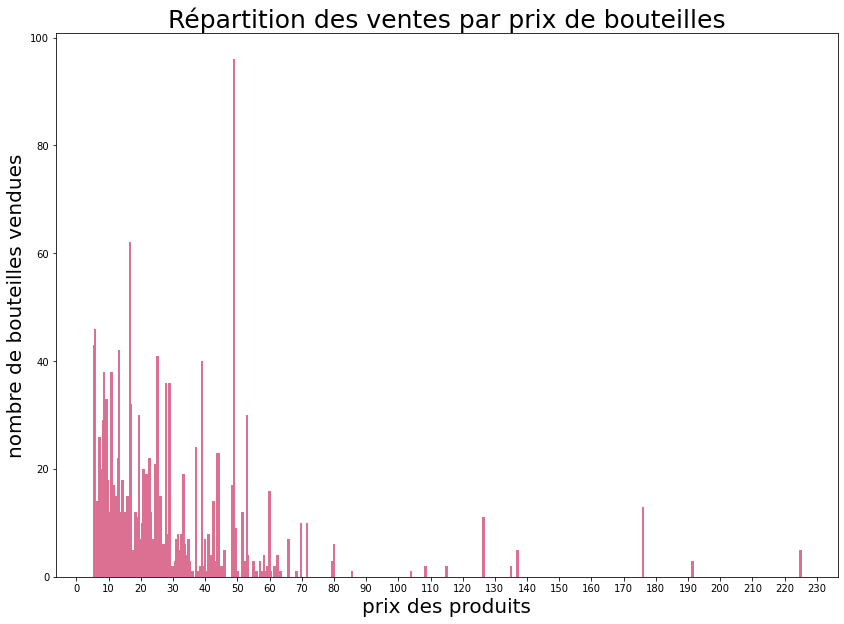

In [65]:
plt.figure(figsize=(14,10))
plt.bar(plage_donnees_prod_x,plage_donnees_prod_y, color = 'palevioletred')
plt.title('Répartition des ventes par prix de bouteilles',fontsize=25)
plt.ylabel('nombre de bouteilles vendues',size=20)
plt.xlabel('prix des produits',size=20)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])
plt.savefig('nbre_vente_par_price_bottleneck.png')

## 1-2 Le CA total de BottleNeck.

In [66]:
print("Chiffre d'affaire BottelNeck : ","{:.2f}".format(general['CA'].sum()),"euros")

Chiffre d'affaire BottelNeck :  70568.60 euros


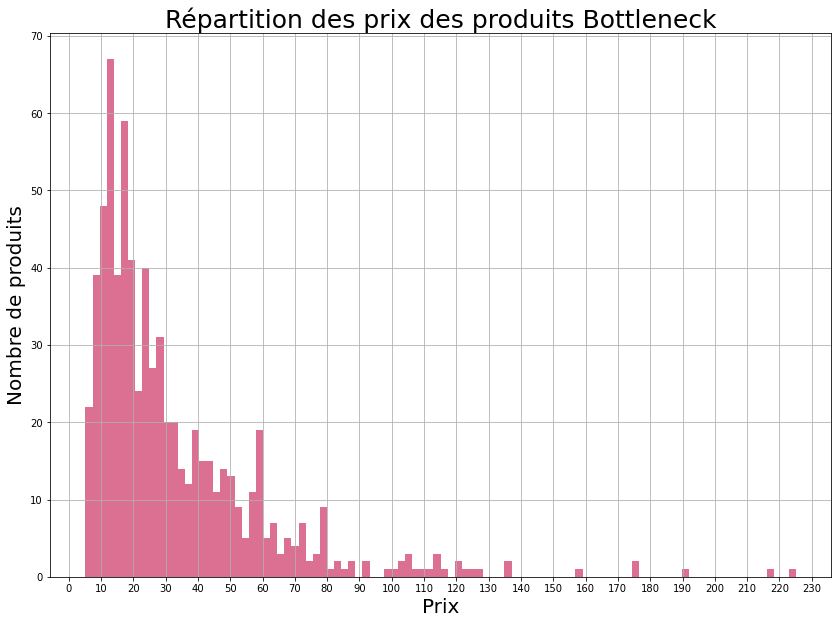

In [67]:
plt.figure(figsize=(14,10))
general['price'].hist(bins=100,color = 'palevioletred')
plt.title('Répartition des prix des produits Bottleneck',fontsize=25)
plt.ylabel('Nombre de produits',size=20)
plt.xlabel('Prix',size=20)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])
plt.savefig('Repartition_prix_bottleneck.png')

# Quatrième partie : Etudes des outliers
Y a-t-il des prix abérrants ?

In [68]:
general['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

# 1- Lecture de boxplot des prix

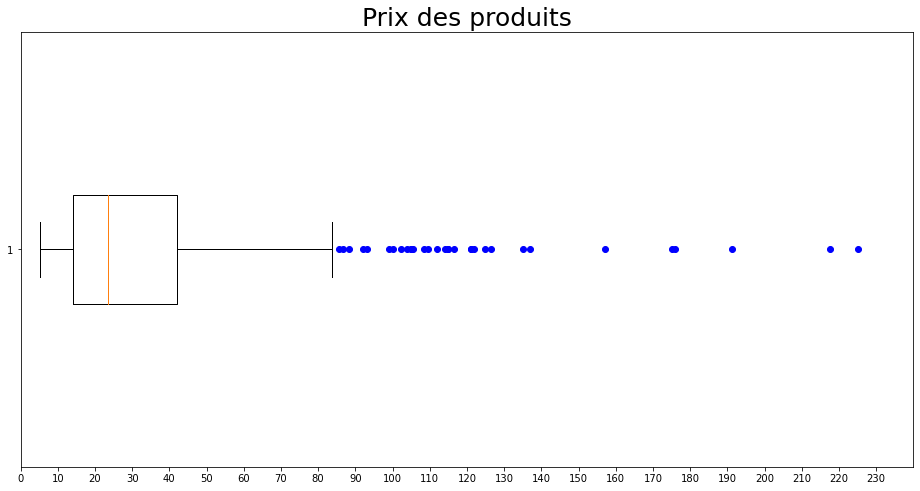

In [69]:
plt.figure(figsize=(16,8))
plt.boxplot(general['price'],sym="bo",widths = 0.5,vert=False)
plt.axis([0, 240,0,2])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230])
plt.title('Prix des produits',fontsize=25)
plt.show()

### En lecture du boxplot ici, il y a environ 30 outliers

# 2- Identification des outiers : Utilisation de l'interquartile
L'interquartile (IQR) est une mesure de dispersion des données qui va nous permettre de calculer les limites hors desquelles les prix peuvent être considérés comme des outliers (dépassent 1,5 fois l'interquartile au dessus du troisième quartile et en dessous du premier quartile)

### Exctraction et classement des prix dans l'ordre croissant

In [70]:
prix=general['price']
prix

0      24.2
1      34.3
2      20.8
3      14.1
4      46.0
       ... 
819     8.4
820    27.5
821    69.0
822    54.8
824    16.3
Name: price, Length: 714, dtype: float64

In [71]:
sorted(prix)

[5.2,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 6.3,
 6.5,
 6.5,
 6.5,
 6.7,
 6.8,
 6.8,
 7.0,
 7.0,
 7.1,
 7.1,
 7.1,
 7.2,
 7.4,
 7.4,
 7.5,
 7.6,
 7.6,
 7.7,
 7.8,
 7.8,
 7.9,
 7.9,
 8.1,
 8.2,
 8.4,
 8.5,
 8.5,
 8.6,
 8.6,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.9,
 8.9,
 8.9,
 9.0,
 9.0,
 9.1,
 9.1,
 9.2,
 9.3,
 9.3,
 9.3,
 9.3,
 9.3,
 9.3,
 9.4,
 9.5,
 9.5,
 9.6,
 9.6,
 9.7,
 9.7,
 9.7,
 9.8,
 9.8,
 9.8,
 9.9,
 9.9,
 9.9,
 9.9,
 9.9,
 9.9,
 10.1,
 10.1,
 10.2,
 10.2,
 10.3,
 10.3,
 10.4,
 10.4,
 10.6,
 10.6,
 10.7,
 10.7,
 10.7,
 10.7,
 10.8,
 10.8,
 10.8,
 10.9,
 10.9,
 11.0,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.3,
 11.3,
 11.5,
 11.5,
 11.6,
 11.6,
 11.6,
 11.8,
 11.9,
 11.9,
 11.9,
 11.9,
 11.9,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.1,
 12.1,
 12.1,
 12.2,
 12.3,
 12.3,
 12.5,
 12.5,
 12.5,
 12.6,
 12.6,
 12.6,
 12.6,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.8,
 12.8,
 12.8,
 12.8,
 12.8,
 12.8,
 12.9,
 12.9,
 12.9,
 12.9,
 12.9,
 13.0,
 13.1,
 13.1,
 13.

### Calcul des premier et troisième quartiles

In [72]:
q1, q3= np.percentile(prix,[25,75])

In [73]:
print("Le premier quartile :","{:.2f}".format(q1),"et le troisième quartile :","{:.2f}".format(q3))

Le premier quartile : 14.10 et le troisième quartile : 42.18


### Calcul de l'interquartile qui est la différence entre le troisième et le premier quartile

In [74]:
iqr = q3 - q1

In [75]:
print("L'écart interquartile est de ","{:.2f}".format(iqr))

L'écart interquartile est de  28.08


### Calcul des limites inférieure et supérieure en dehors desquelles les prix peuvent être considérés comme des outliers

In [76]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("Les limites inférieure et supérieure sont","{:.2f}".format(lower_bound),"et","{:.2f}".format(upper_bound))

Les limites inférieure et supérieure sont -28.01 et 84.29


## Liste des outliers trouvés
Il y a 32 produits qui sont ici outliers (prix supérieur à 84 euros.

In [77]:
test_outliers=general[(general['price'] > 84)]
test_outliers

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
154,4115,1,100.0,11,instock,15382,0.0,0.0,0.0,0.0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
156,4132,1,88.4,5,instock,11668,0.0,0.0,0.0,0.0,...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
291,4352,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
293,4355,1,126.5,2,instock,12589,0.0,0.0,0.0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
297,4359,1,85.6,0,outofstock,13853,0.0,0.0,0.0,0.0,...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6
310,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
311,4404,1,108.5,2,instock,3507,0.0,0.0,0.0,0.0,...,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0
313,4406,1,157.0,3,instock,7819,0.0,0.0,0.0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
314,4407,1,104.0,6,instock,3509,0.0,0.0,0.0,0.0,...,2020-07-04 09:45:03,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0
320,4582,1,109.6,7,instock,12857,0.0,0.0,0.0,0.0,...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [78]:
general[['price','total_sales','CA','stock_status','stock_quantity','product_id','sku',
            'post_title']] .sort_values('price',ascending=False).head(32)

,price,total_sales,CA,stock_status,stock_quantity,product_id,sku,post_title
291,225.0,5.0,1125.0,outofstock,0,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008
525,217.5,0.0,0.0,instock,20,5001,14581,David Duband Charmes-Chambertin Grand Cru 2014
692,191.3,3.0,573.9,instock,10,5892,14983,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
310,176.0,13.0,2288.0,instock,8,4402,3510,Cognac Frapin VIP XO
657,175.0,0.0,0.0,instock,12,5767,15185,Camille Giroud Clos de Vougeot 2016
313,157.0,0.0,0.0,instock,3,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...
478,137.0,5.0,685.0,instock,13,4904,14220,Domaine Des Croix Corton Charlemagne Grand Cru...
752,135.0,2.0,270.0,instock,10,6126,14923,Champagne Gosset Célébris Vintage 2007
293,126.5,11.0,1391.5,instock,2,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs
615,124.8,0.0,0.0,instock,12,5612,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...


## Représentation graphique de ces outliers

In [79]:
prix_1=general[general['price']<84]

In [80]:
prix_2=general[general['price']>84]

Text(0.5, 0, 'Les produits')

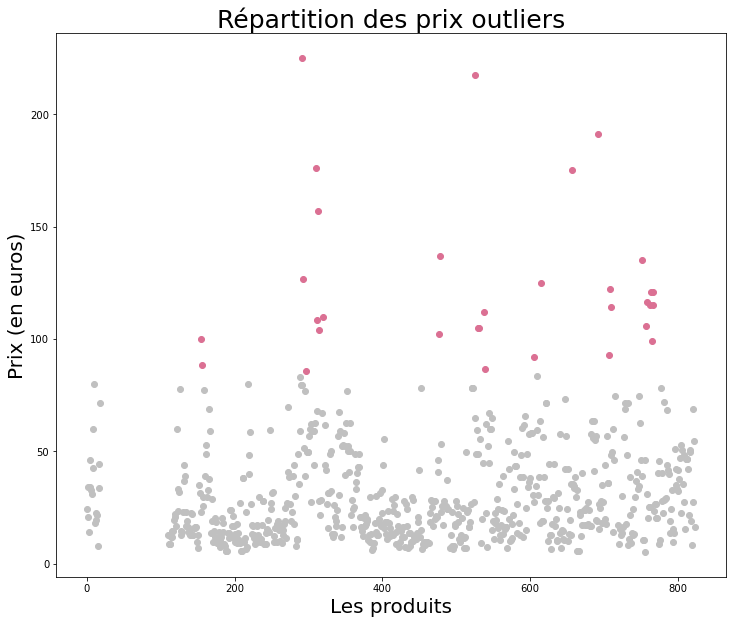

In [81]:
plt.figure(figsize=(12,10))
plt.scatter(prix_1.index,prix_1['price'],c='silver')
plt.scatter(prix_2.index,prix_2['price'],color = 'palevioletred')
plt.title('Répartition des prix outliers',fontsize=25)
plt.ylabel('Prix (en euros)',fontsize=20)
plt.xlabel('Les produits',size=20)

# Remarque : Les outliers sont les produits ayant un prix supérieur à 84 euros (ici jusqu'à 225 euros). Des bouteilles de vin (Champagne, Cognac etc) à ces prix n'est pas aberrant.